Saving bmi.csv to bmi.csv
Mean Squared Error (MSE): 190.75


/tmp/ipython-input-5-1431680886.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exercise_Level'].fillna(mode_value, inplace=True)


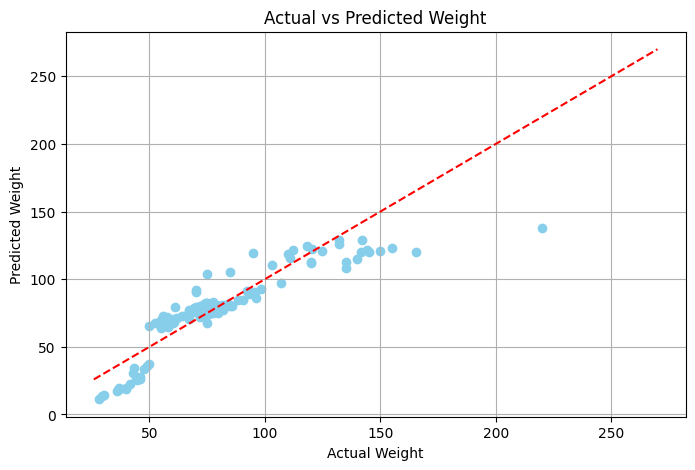

In [5]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 📥 Load Dataset (Upload your CSV file manually in Colab using the file uploader)
from google.colab import files
uploaded = files.upload()

# Example filename: bmi.csv
df = pd.read_csv('bmi.csv')  # Update this if your file is named differently
df.head()

# 🧹 Preprocessing: Map Exercise Level from BmiClass
exercise_map = {
    'Underweight': 3,
    'Normal weight': 3,
    'Overweight': 2,
    'Obese Class 1': 1,
    'Obese Class 2': 1,
    'Obese Class 3': 1
}
df['Exercise_Level'] = df['BmiClass'].map(exercise_map)

# Fill missing Exercise_Level with mode
mode_value = df['Exercise_Level'].mode()[0]
df['Exercise_Level'].fillna(mode_value, inplace=True)

# 🎯 Feature Selection
X = df[['Age', 'Height', 'Exercise_Level']]
y = df['Weight']

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 📊 Visualization: Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Weight')
plt.grid(True)
plt.show()
